In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.lines as mlines

In [3]:
# Load map background
m = Basemap(projection='lcc', resolution='h', 
            lat_0=0.1, lon_0=37.5,
            width=1.5E6, height=1.2E6)


In [4]:
# load KCSAP stations 
KCSAP_stations = pd.read_csv("/home/sdanioth/Documents/git/plot_map/KCSAP_stations.csv")
# print(KCSAP_stations)

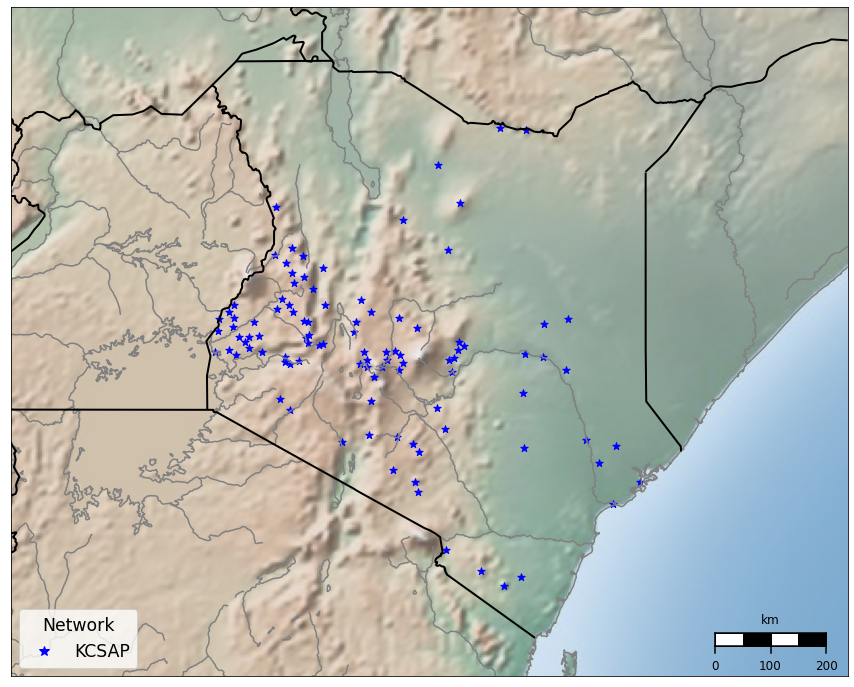

In [8]:
#### DRAW MAP ####

fig = plt.figure(figsize=(15, 15))


# map background
# m.fillcontinents(color='tan',lake_color='lightblue')
m.shadedrelief()
# m.etopo()
# m.bluemarble()
m.drawmapscale(lon=43, lat=-4.7, lon0=43,lat0=-4, length=200, barstyle="fancy", linecolor="black", fillcolor2="black", fontsize=12, fontcolor="black")
m.drawcoastlines(color='grey', linewidth=1.5)
m.drawrivers(color='grey', linewidth=1.5)
m.drawcountries(color='black', linewidth=2)
# m.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)
# m.drawmapboundary(color='k', linewidth=1.0, fill_color=None, zorder=None, ax=None)


# add KCSAP stations
KCSAP_stations = pd.read_csv("/home/sdanioth/Documents/git/plot_map/KCSAP_stations.csv")
lat = KCSAP_stations["Latitude"].values
lon = KCSAP_stations["Longitude"].values
m.scatter(lon, lat,latlon=True,c="blue",s=60,marker="*")


# legend
KCSAP = mlines.Line2D([], [], color='blue', marker='*', linestyle='None',markersize=10, label='KCSAP')
plt.legend(handles=[KCSAP], loc=3, title="Network", title_fontsize="xx-large", labelcolor="black", fontsize="xx-large")


# save plot
plt.savefig("/home/sdanioth/Documents/git/plot_map/plots/test_plot.pdf", bbox_inches='tight')

/home/sdanioth/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


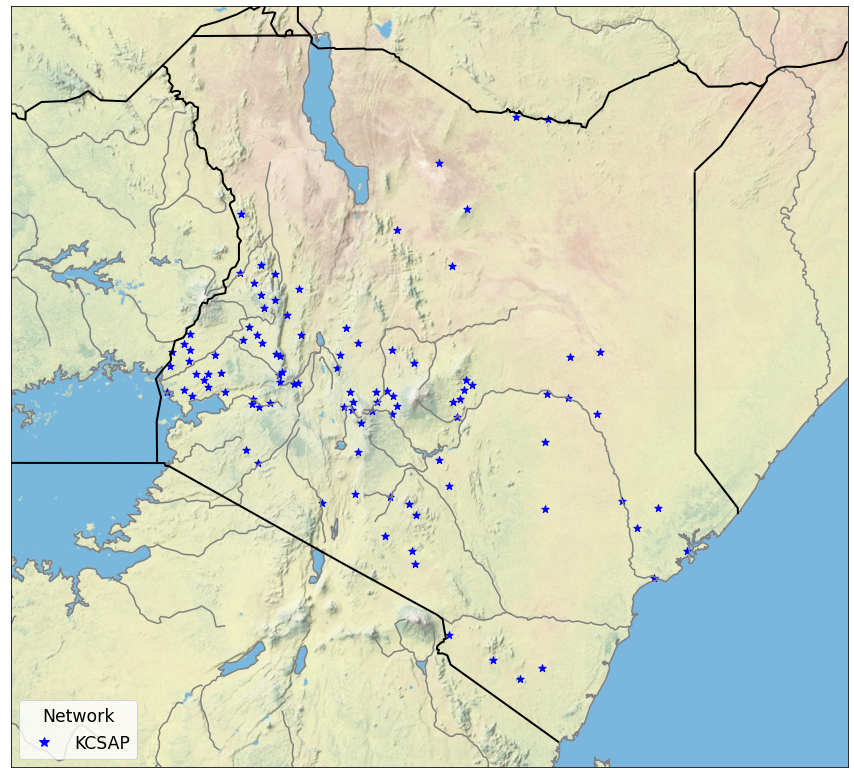

In [43]:
# Other backgrounds: from https://rkiuchir.medium.com/20-background-image-in-python-basemap-using-arcgis-api-78c0d12b93be

map_list = ['World_Shaded_Relief',          # 0
    'World_Terrain_Base',                   # 1
    'Elevation/World_Hillshade',            # 2
    'Elevation/World_Hillshade_Dark',       # 3
    'NGS_Topo_US_2D',                       # 4
    'USA_Topo_Maps',                        # 5
    'World_Physical_Map',                   # 6
    'Ocean/World_Ocean_Base',               # 7
    'ESRI_Imagery_World_2D',                # 8
    'World_Imagery',                        # 9
    'World_Topo_Map',                       # 10
    'World_Street_Map',                     # 11
    'ESRI_StreetMap_World_2D',              # 12
    'NatGeo_World_Map',                     # 13
    'Specialty/DeLorme_World_Base_Map',     # 14
    'Specialty/World_Navigation_Charts',    # 15
    'Canvas/World_Light_Gray_Base',         # 16
    'Canvas/World_Dark_Gray_Base',          # 17
    'Reference/World_Transportation',       # 18
    'Reference/World_Reference_Overlay'     # 19
]

def draw_arcgisimage(map, map_list, resolution):
    map.arcgisimage(server="http://server.arcgisonline.com/ArcGIS",service=map_list, xpixels = resolution, verbose= False)

fig = plt.figure(figsize=(15, 15))   

lonmin = 32
lonmax = 43
latmin = -5
latmax = 5

map = Basemap(resolution='i',projection='cyl',
              llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax)

resolution = 1500
# good backgrounds: 0, 1, 2, 6, 10, 11, 13, 14
draw_arcgisimage(map, map_list[6], resolution)

# edith background
map.drawcoastlines(color='grey', linewidth=1.5)
map.drawrivers(color='grey', linewidth=1.5)
map.drawcountries(color='black', linewidth=2)


# add stations
map.scatter(lon, lat,latlon=True,c="blue",s=60,marker="*")

# legend
KCSAP = mlines.Line2D([], [], color='blue', marker='*', linestyle='None',markersize=10, label='KCSAP')
plt.legend(handles=[KCSAP], loc=3, title="Network", title_fontsize="xx-large", labelcolor="black", fontsize="xx-large")


# save plot
plt.savefig("/home/sdanioth/Documents/git/plot_map/plots/test_plot2.pdf", bbox_inches='tight')